In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
transaction_data = pd.read_csv('transaction_data.csv')
purchase_behaviour = pd.read_csv('purchase_behaviour.csv')

# Display the first few rows of each dataset
print("Transaction Data:")
print(transaction_data.head())

print("\nPurchase Behaviour Data:")
print(purchase_behaviour.head())

Transaction Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Purchase Behaviour Data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG F

In [6]:
merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR', how='inner')

# Display the merged dataset
print(merged_data.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  
4  MIDAGE SINGLES/COUPL

In [9]:
# Calculate price per product
merged_data['price'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

# Calculate total revenue per product
merged_data['total_revenue'] = merged_data['price'] * merged_data['PROD_QTY']

# Group by product and sum the revenue
product_profitability = merged_data.groupby('PROD_NBR')['total_revenue'].sum().reset_index()

# Sort by profitability and get the top 3
top_3_products = product_profitability.sort_values(by='total_revenue', ascending=False).head(3)

print("Top 3 Most Profitable Products:")
print(top_3_products)


Top 3 Most Profitable Products:
    PROD_NBR  total_revenue
3          4        40352.0
13        14        36367.6
15        16        34804.2


In [11]:
# Calculate total spending per customer
customer_spending = merged_data.groupby('LYLTY_CARD_NBR')['total_revenue'].sum().reset_index()

# Sort by total spending and get the top 10 loyal customers
loyal_customers = customer_spending.sort_values(by='total_revenue', ascending=False).head(10)

# Merge with purchase behaviour to get customer characteristics
loyal_customer_details = pd.merge(loyal_customers, purchase_behaviour, on='LYLTY_CARD_NBR', how='inner')

print("Characteristics of Loyal Customers:")
print(loyal_customer_details)


Characteristics of Loyal Customers:
   LYLTY_CARD_NBR  total_revenue              LIFESTAGE PREMIUM_CUSTOMER
0          226000        1300.00         OLDER FAMILIES          Premium
1          230078         138.60         OLDER FAMILIES           Budget
2           63197         132.80         OLDER FAMILIES           Budget
3          259009         127.20  OLDER SINGLES/COUPLES       Mainstream
4          162039         126.80         OLDER FAMILIES       Mainstream
5           58361         124.80         YOUNG FAMILIES           Budget
6          230154         124.40         OLDER FAMILIES           Budget
7           94185         122.80         YOUNG FAMILIES          Premium
8          130090         122.65         YOUNG FAMILIES           Budget
9          179228         120.80         YOUNG FAMILIES           Budget


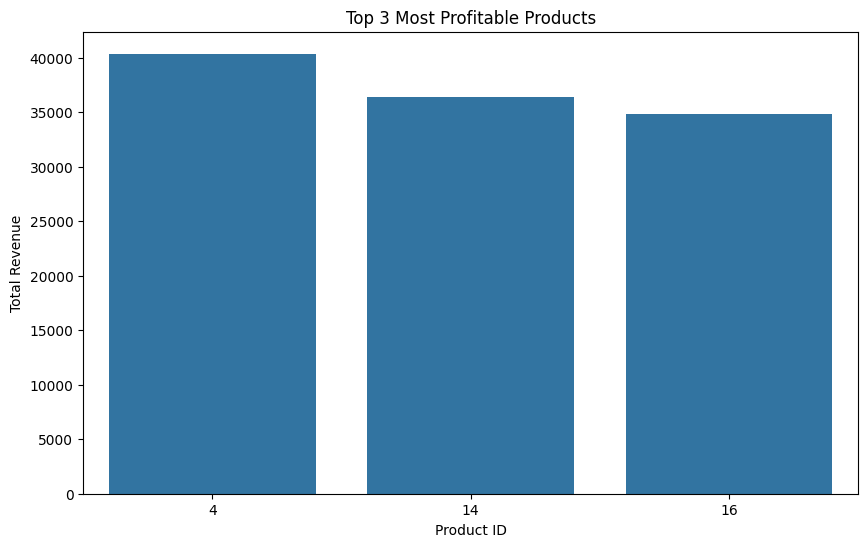

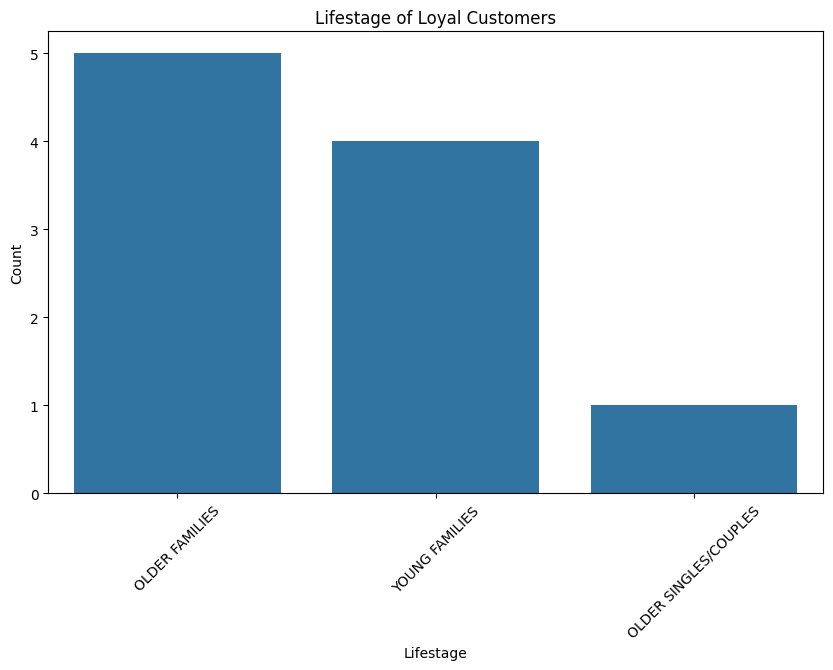

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 3 products
plt.figure(figsize=(10, 6))
sns.barplot(x='PROD_NBR', y='total_revenue', data=top_3_products)
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='LIFESTAGE', data=loyal_customer_details, order=loyal_customer_details['LIFESTAGE'].value_counts().index)
plt.title('Lifestage of Loyal Customers')
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


In [17]:
top_3_products.to_csv('top_3_products.csv', index=False)
loyal_customer_details.to_csv('loyal_customer_details.csv', index=False)